# TP - Numpy neural network (correction)

L'objectif de ce TP est de construire un réseau de neurones dense et de taille arbitraire. On se propose de résoudre un problème de classification multinomial (par exemple le jeu de données MNIST). L'architecture que nous allons mettre en place est la suivante :

$$INPUTS \rightarrow (LINEAR \rightarrow ReLU)^{L-2} \rightarrow LINEAR \rightarrow SOFTMAX.$$

Il s'agit de construire $L$ couches, toutes étant activées par une fonction ReLU exceptée la dernière. La dernière couche est activée par une fonction $softmax$ qui permet d'attribuer un score normalisé entre 0 et 1 pour chaque classe à prédire.

<img src="./images/dense.png" alt="Drawing" style="width: 600px;"/>


Dans la suite, nous utiliserons uniquement le paquet `numpy` pour les calculs matriciels.

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


___
# Table des matières
* [I. Propagation à travers un réseau de neurones](#part1)
    * [Exercice n°1 : initialisation des poids par la méthode de Xavier](#exo1)
    * [Exercice n°2 : propagation linéaire à travers une couche](#exo2)
    * [Exercice n°3 : fonction d'activation ReLU](#exo3)
    * [Exercice n°4 : fonction d'activation softmax](#exo4)
    * [Exercice n°5 : propagation complète à travers une couche](#exo5)
    * [Exercice n°6 : propagation complète à travers le réseau de neurones](#exo6)
    * [Exercice n°7 : fonction de coût](#exo7)
* [II. Rétro-propagation à travers un réseau de neurones](#part2)
    * [Exercice n°8 : rétro-propagation linéaire à travers une couche](#exo8)
    * [Exercice n°9 : rétro-propagation à travers la fonction d'activation ReLU](#exo9)
    * [Exercice n°10 : rétro-propagation à travers la fonction d'activation softmax](#exo10)
    * [Exercice n°11 : rétro-propagation complète à travers une couche](#exo11)
    * [Exercice n°12 : rétro-propagation complète à travers le réseau de neurones](#exo12)
    * [Exercice n°13 : rétro-propagation de la fonction de coût](#exo13)
    * [Exercice n°14 : descente de gradient élémentaire](#exo14)
    * [Exercice n°15 : entraînement d'un réseau de neurones](#exo15)
* [III. Application au jeu de données MNIST](#part3)
    * [1) Lecture](#lecture)
    * [2) Visualisation](#visualisation)
    * [3) Pré-traitement](#pretraitement)
    * [4) Entraînement](#entrainement)
    * [5) Prédiction](#prediction)
    * [6) Performance](#performance)
    * [7) Analyse d'erreurs](#analyse)
* [IV. Pour aller plus loin](#part4)
    * [1) Conclusions](#conclusions)
    * [2) Comparaison : implementation en `tf.keras`](#tf-keras)

<img src="images/backprop.png" alt="Drawing" style="width: 600px;"/>

___

# I. Propagation à travers un réseau de neurones

<a class='anchor' id='part1'></a>

Dans cette partie, on se propose de construire l'architecture du réseau de neurones et d'implémenter les fonctions élémentaires idoines.

## Exercice n°1 : initialisation des poids par la méthode de Xavier

<a class='anchor' id='exo1'></a>

La première étape de construction du réseau de neurones consiste à initialiser les poids de chaque couche. Les couches $l-1$ et $l$ sont reliées entre elles par des poids $W^{[l]}$ et $b^{[l]}$ qui correspondent respectivement aux coefficients de combinaisons linéaires et aux biais. Ces poids seront stockés dans un dictionnaire dont les clefs seront 'W1', 'B1', 'W2', 'B2' etc. 

Pour initialiser les poids, on se propose d'implémenter l'initialisation de Xavier, qui consiste à :
* initialiser les coefficients $W^{[l]}$ selon une loi normale de moyenne nulle et de variance $2/(N^{[l-1]} + N^{[l]})$, où $N^{[l-1]}$ et $N^{[l]}$ correspondent respectivement aux nombres de neurones dans les couches $l-1$ et $l$.
* initialiser les coefficients $B^{[l]}$ à zéro.

L'initialisation de Xavier permet de prévenir les risques de disparition ou d'explosion de gradient.

**Consigne :** compléter la fonction `initialize_weights` suivante. 
* Elle prend en entrée `layers_dims`, une liste de nombres entiers donnant le nombre de neurones dans chaque couche, dans l'ordre de propagation, incluant le nombre de variables explicatives et le nombre de sortie. Par exemple, un réseau prenant en entrée 20 variables, présentant une couche cachée de 10 neurones, et devant prédire 3 sorties correspond à `layers_dims = [20, 10, 3]`.
* Elle renvoie en sortie un dictionnaire dont les clefs sont 'W1', 'B1', 'W2', 'B2' etc, et dont les valeurs sont des tableaux `numpy` initialisés selon la méthode de Xavier.

**Indice :** on pourra se baser sur les fonctions [numpy.random.randn](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html), [numpy.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) et [numpy.random.seed](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html).

In [ ]:
def initialize_weights(layers_dims, random_state=1):
    """
    Xavier initialization of an L-layer dense neural network.
    
    Parameters
    ----------
    layer_dims: list of ints
        Number of neurons in each layer, from input (included) to output (included).
    random_state: int, optional (default=1)
        Random seed for initialization.
    
    Returns
    -------
    weights: dict
        Coefficients (W) and biases (b) between each layer : 'W1', 'B1', ..., 'WL', 'BL'
        W: weight matrix of shape (layer_dims[l], layer_dims[l-1])
        B: bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(random_state)
    weights = {}
    L = len(layers_dims)
    for l in range(1, L):
        amplitude = np.sqrt(2/(layers_dims[l-1] + layers_dims[l]))
        weights['W' + str(l)] = amplitude*np.random.randn(layers_dims[l], layers_dims[l-1])
        weights['B' + str(l)] = np.zeros((layers_dims[l], 1))
    return weights

**Tests unitaires** (ne pas changer la graine)

In [ ]:
layers_dims = [5, 4, 3]
weights = initialize_weights(layers_dims, random_state=1)

In [ ]:
expected_B1 = np.zeros((4, 1))
expected_B2 = np.zeros((3, 1))
expected_W1 = np.array(
    [[ 0.76572375, -0.28838474, -0.24898255, -0.50580226,  0.40795707],
     [-1.08495575,  0.82251215, -0.35883637,  0.15039647, -0.11755432],
     [ 0.68924429, -0.97115964, -0.15198893, -0.18104496,  0.53446404],
     [-0.51849372, -0.08128344, -0.41382643,  0.01989975,  0.27474173]]
)
expected_W2 = np.array(
    [[-0.5883057 ,  0.61188056,  0.48192051,  0.26859452],
     [ 0.48152776, -0.36546791, -0.06568759, -0.5001898 ],
     [-0.1431922 ,  0.28348692, -0.36970822, -0.21207368]]
)

In [ ]:
assert list(weights.keys()) == ['W1', 'B1', 'W2', 'B2']
np.testing.assert_almost_equal(weights['B1'], expected_B1)
np.testing.assert_almost_equal(weights['B2'], expected_B2)
np.testing.assert_almost_equal(weights['W1'], expected_W1)
np.testing.assert_almost_equal(weights['W2'], expected_W2)
print('Très bien !')

Très bien !


## Exercice n°2 : propagation linéaire à travers une couche

<a class='anchor' id='exo2'></a>

A présent on se focalise sur la propagation à travers une seule couche du réseau de neurones. La première étape consiste à opérer une combinaison linéaire des activations de la couche précédente.

Notant $l$ le numéro de la couche courante, la couche précédente numéro $l-1$ est entièrement décrite par la matrice $A^{[l-1]}$, dont les éléments sont $a^{[l-1](i)}_j$, et correspondent à l'activation numéro $j$ (ligne $j$) de l'exemple numéro $i$ (colonne $i$) du batch de données.

Quant à la couche courante $l$, elle se décrit par la matrice $Z^{[l]}$, dont les éléments sont $z^{[l-1](i)}_j$, et correspondent à la pré-activation numéro $j$ (ligne $j$) de l'exemple numéro $i$ (colonne $i$) du batch de données.

La phase de propagation à travers la couche courante consiste simplement à l'opération de combinaison linéaire suivante :

$$z_j^{[l](i)} = \sum_k w_{jk}^{[l]}a_k^{[l-1](i)} + b_j^{[l]},$$

ou en notation matricielle :

$$Z^{[l]} = W^{[l]}A^{[l-1]} + B^{[l]}.$$

A noter : $A^{[0]} = X$, le batch de données d'entrée (variables en lignes, observations en colonnes). 

**Consigne :** compléter la fonction `linear_forward` suivante.
* Elle prend en entrée la matrice $A^{[l-1]}$ et les poids $W^{[l]}$ et $B^{[l]}$.
* Elle renvoie en sortie la matrice $Z^{[l]}$, ainsi qu'un cache contenant $(A^{[l-1]},  W^{[l]})$ et qui montrera son utilité dans la phase de rétro-propagation.

**Indice :** on pourra se baser sur la fonction [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) pour faire le produit matriciel.

In [ ]:
def linear_forward(A_prev, W, B):
    """
    Implement the linear combination of neurons in the previous layer.

    Parameters
    ----------
    A_prev: numpy array os shape (size of previous layer, number of examples)
        Activations of the previous layer.
    W: numpy array of shape (size of current layer, size of previous layer)
        Weight matrix combining previous layer into current layer.
    B: numpy array of shape (size of current layer, 1)
        Bias vector added to the linear combination.

    Returns
    -------
    Z: numpy array of size (size of current layer, number of examples)
        Pre-activation values of the current layer.
    cache: tuple of len 2
        A_prev and w stored in anticipation of back-propagation.
    """
    Z = np.dot(W, A_prev) + B
    cache = (A_prev, W)
    return Z, cache

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
A = np.random.randn(5, 2)
W = np.random.randn(4, 5)
B = np.random.randn(4, 1)
Z, cache = linear_forward(A, W, B)

In [ ]:
expected_Z = np.array(
    [[ 2.18400754,  1.37602366],
     [-2.59239459,  2.30407694],
     [-1.1351593 , -3.92430936],
     [-2.99894083,  1.93029949]]
)

In [ ]:
assert len(cache) == 2
np.testing.assert_almost_equal(Z, expected_Z)
np.testing.assert_almost_equal(cache[0], A)
np.testing.assert_almost_equal(cache[1], W)
print('Très bien !')

Très bien !


## Exercice n°3 : fonction d'activation ReLU

<a class='anchor' id='exo3'></a>

Une fois obtenu la matrice $Z^{[l]}$, on injecte de la non-linéarité en l'enrobant dans une fonction non-linéaire. Typiquement, nous aurons besoin d'une fonction d'activation $ReLU$ pour les couches intermédiaires. Il s'agit donc de calculer 

$$A^{[l]} = ReLU(Z^{[l]}).$$

On prendra soin d'effectuer l'activation de la matrice $Z^{[l]}$ de manière vectorisée.

Pour rappel, $\forall x, ReLU(x) = \max(0, x)$.

<img src="images/relu.png" alt="Drawing" style="width: 600px;"/>

**Consigne :** compléter la fonction `relu` suivante.
* Elle prend en entrée une matrice de taille quelconque $Z$.
* Elle renvoie en sortie une matrice $A$, activation $ReLU$ de $Z$, ainsi qu'un cache contenant $Z$ qui montrera son utilité dans la phase de rétro-propagation.

**Indice :** on pourra se baser sur la fonction [np.maximum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html).

In [ ]:
def relu(Z):
    """
    Vectorized implementation of the ReLU activation function.
    
    Parameters
    ----------
    Z: numpy array of any shape
        Array of inputs.
        
    Returns
    -------
    A: numpy array of same shape as Z
        ReLU activation of the inputs.
    cache: numpy array of same shape as Z
        A reference to Z in anticipation of back-propagation.
    """
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
Z = np.random.randn(5, 2)
A, cache = relu(Z)

In [ ]:
expected_A = np.array(
    [[1.62434536, 0.        ],
     [0.        , 0.        ],
     [0.86540763, 0.        ],
     [1.74481176, 0.        ],
     [0.3190391 , 0.        ]]
)

In [ ]:
np.testing.assert_almost_equal(A, expected_A)
np.testing.assert_almost_equal(cache, Z)
print('Très bien !')

Très bien !


## Exercice n°4 : fonction d'activation softmax

<a class='anchor' id='exo4'></a>

Dans un problème de classification multinomial, la dernière couche d'activation est une couche $softmax$ :

$$a_j^{[L](i)} = \frac{\exp{Z_j^{[L](i)}}}{\sum_k\exp{Z_k^{[L](i)}}}$$

Une telle fonction d'activation a deux propriétés remarquables :
* Tous les coefficients $a_j^{[L](i)}$ sont compris entre 0 et 1.
* Tous les coefficients $a_j^{[L](i)}$ se somment à 1 : $\sum_j a_j^{[L](i)} = 1$.

Ces propriétés permettent de normaliser les scores en sortie du réseau de neurones. 

On prendra soin d'effectuer l'activation de la matrice $Z^{[l]}$ de manière vectorisée.

**Attention !** La présence d'exponentielles rend le calcul de $softmax$ extrêment instable numériquement, avec un risque d'*overflow* important. On pourra utiliser l'astuce suivante :

$$\frac{\exp{z_j^{[L](i)}}}{\sum_k\exp{z_k^{[L](i)}}} = \frac{\exp\left(z_j^{[L](i)} - M^{(i)}\right)}{\sum_k\exp\left(z_k^{[L](i)} - M^{(i)}\right)}$$

où $M^{(i)} = \max_j z_j^{[L](i)}$. Cela permet d'assurer que tous les arguments des exponentielles sont négatifs, empêchant le risque d'*overflow*.

**Consigne :** compléter la fonction `softmax` suivante.
* Elle prend en entrée une matrice de taille quelconque $Z$.
* Elle renvoie en sortie une matrice $A$, activation $softmax$ de $Z$, ainsi qu'un cache contenant $A$ qui montrera son utilité dans la phase de rétro-propagation.

**Indice :** on pourra se baser sur les fonctions [np.max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html) et [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) en prenant garde à la valeur de l'argument `axis`.

In [ ]:
def softmax(Z):
    """
    Vectorized implementation of the softmax activation function.
    Numerical stability is enforced by retrieving the maximum of the exponentials.
    
    Parameters
    ----------
    Z: numpy array of any shape
        Array of inputs.
        
    Returns
    -------
    A: numpy array of same shape as Z
        Softmax activation of the inputs.
    cache: numpy array of same shape as Z
        A reference to A in anticipation of back-propagation.
    """
    M = np.max(Z, axis=0)
    ez = np.exp(Z - M)
    div = np.sum(ez, axis=0)
    A = ez/div
    cache = A
    return A, cache

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
Z = np.random.randn(5, 2)
A, cache = softmax(Z)

In [ ]:
expected_A = np.array(
    [[0.3351805 , 0.24313076],
     [0.03894507, 0.15329853],
     [0.15691927, 0.04487214],
     [0.37809126, 0.20937961],
     [0.09086391, 0.34931896]]
)

In [ ]:
np.testing.assert_almost_equal(A, expected_A)
np.testing.assert_almost_equal(cache, A)
print('Très bien !')

Très bien !


## Exercice n°5 : propagation complète à travers une couche

<a class='anchor' id='exo5'></a>

A présent, on peut implémenter une propagation complète à travers une couche en enchaînant la propagation linéaire et l'activation.

**Consigne :** compléter la fonction `forward_step` suivante.
* Elle prend en entrée la matrice $A^{[l-1]}$ et les poids $W^{[l]}$ et $B^{[l]}$. Elle prend en entrée également une fonction `activation` qui sera soit `relu` soit `softmax`.
* Elle renvoie en sortie la matrice $A^{[l]}$, ainsi qu'un cache qui montrera son utilité dans la phase de rétro-propagation. Le cache sera simplement un tuple contenant les caches linéaire et d'activation.

**Indice :** on pourra se baser sur la fonction `linear_forward` précédente et l'interface commune à `relu` et `softmax`.

In [ ]:
def forward_step(A_prev, W, B, activation):
    """
    Implement linear combination with activation of the current layer.

    Parameters
    ----------
    A_prev: numpy array of shape (size of previous layer, number of examples)
        Activations of the previous layer.
    W: numpy array of shape (size of current layer, size of previous layer)
        Weight matrix combining previous layer into current layer.
    B: numpy array of shape (size of current layer, 1)
        Bias vector added to the linear combination.
    activation: function
        Activation function of the current layer.

    Returns
    -------
    A: numpy array of shape (size of current layer, number of examples)
        Activations of the current layer.
    cache: tuple of len 2
        Store (linear_cache, activation_cache) obtained through linear_forward() and the activation function.
    """
    Z, linear_cache = linear_forward(A_prev, W, B)
    A, activation_cache = activation(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(5, 2)
W = np.random.randn(4, 5)
B = np.random.randn(4, 1)
Z, _ = linear_forward(A_prev, W, B)

$ReLU$

In [ ]:
A, cache = forward_step(A_prev, W, B, relu)
linear_cache, activation_cache = cache

In [ ]:
expected_A = np.array(
    [[2.18400754, 1.37602366],
     [0.        , 2.30407694],
     [0.        , 0.        ],
     [0.        , 1.93029949]]
)

In [ ]:
assert len(cache) == 2
np.testing.assert_almost_equal(A, expected_A)
np.testing.assert_almost_equal(activation_cache, Z)
print('Très bien !')

Très bien !


$softmax$

In [ ]:
A, cache = forward_step(A_prev, W, B, softmax)
linear_cache, activation_cache = cache

In [ ]:
expected_A = np.array(
    [[9.52180846e-01, 1.89564479e-01],
     [8.02332441e-03, 4.79518513e-01],
     [3.44527268e-02, 9.45913836e-04],
     [5.34310324e-03, 3.29971094e-01]]
)

In [ ]:
assert len(cache) == 2
np.testing.assert_almost_equal(A, expected_A)
np.testing.assert_almost_equal(activation_cache, A)
print('Très bien !')

Très bien !


## Exercice n°6 : propagation complète à travers le réseau de neurones

<a class='anchor' id='exo6'></a>

Pour implémenter la propagation complète à travers tout le réseau, il suffit de chaîner les propagations à travers chaque couche. Pour rappel, la structure du réseau de neurones est la suivante :

$$INPUTS \rightarrow (LINEAR \rightarrow ReLU)^{L-2} \rightarrow LINEAR \rightarrow SOFTMAX.$$

**Consigne :** compléter la fonction `forward_propagation` suivante.
* Elle prend en entrée un batch de données $X$ (variables en lignes, exemples en colonnes) et les poids du réseau de neurones.
* Elle renvoie en sortie la matrice $A^{[L]}$, dernière du réseau (activations en lignes, exemples en colonnes), ainsi que tous les caches concaténés dans une liste de taille $L$.

**Indice :** le nombre de couches $L$ peut se déduire directement du dictionnaire de poids. La première matrice d'activation n'est autre que le batch de données. On se basera sur la fonction `forward_step` implémentée précédemment, ainsi que les fonctions `relu` et `softmax`.

In [ ]:
def forward_propagation(X, weights):
    """
    Forward propagation through an L-layer neural network, made up of L-2 ReLU layers and a softmax layer.
    
    Parameters
    ----------
    X: numpy array of shape (number of features, number of examples)
        Input data batch.
    weights: dict
        Weights of the neural network. Output of initizalize_weights().
    
    Returns
    -------
    A_last: numpy array of shape (number of classes, number of examples)
        Activation of the last layer.
    caches: list of len L
        List containing every caches of forward_step() calls.
    """
    caches = []
    A = X
    L = len(weights) // 2
    for l in range(1, L):
        W, B = weights['W' + str(l)], weights['B' + str(l)]
        A, cache = forward_step(A, W, B, relu)
        caches.append(cache)
    W, B = weights['W' + str(L)], weights['B' + str(L)]
    A_last, cache = forward_step(A, W, B, softmax)
    caches.append(cache)
    return A_last, caches

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
X = np.random.randn(5, 4)
W1 = np.random.randn(4, 5)
B1 = np.random.randn(4, 1)
W2 = np.random.randn(4, 4)
B2 = np.random.randn(4, 1)
W3 = np.random.randn(4, 4)
B3 = np.random.randn(4, 1)
weights = {'W1':W1, 'B1':B1, 'W2':W2, 'B2':B2, 'W3':W3, 'B3':B3}
A_last, caches = forward_propagation(X, weights)

In [ ]:
expected_A_last = np.array(
    [[1.36155791e-01, 8.44177245e-01, 9.90263038e-01, 2.54413757e-01],
     [6.27941116e-03, 1.55078319e-01, 4.21438884e-03, 5.19651393e-06],
     [4.04077604e-01, 4.62359342e-06, 1.78087398e-08, 8.22860481e-05],
     [4.53487194e-01, 7.39812046e-04, 5.52255490e-03, 7.45498761e-01]]
)

In [ ]:
np.testing.assert_almost_equal(A_last, expected_A_last)
assert len(caches) == 3
print('Très bien !')

Très bien !


## Exercice n°7 : fonction de coût

<a class='anchor' id='exo7'></a>

C'est la fonction de coût qui fait la jointure entre propagation et rétro-propagation dans le réseau de neurones. Dans le cas d'une classification multinomiale, c'est l'entropie croisée. Elle s'écrit

$$\mathcal{L} = -\frac{1}{m}\sum_i \sum_j y_j^{(i)} \log a_j^{[L](i)},$$

où $m$ est le nombre d'exemples dans le batch de données, et $y^{(i)}_j$ est l'encodage à chaud (*one-hot*) de la cible. En particulier, pour un exemple $i$ donné de classe $k$, $y^{(i)}$ est un vecteur binaire contenant des 0 partout sauf un 1 à la position $k$.

**Consigne :** compléter la fonction `cross_entropy` suivante.
* Elle prend en entrée la matrice $A^{[L]}$ correspondant à la dernière couche activée du réseau de neurones, et la matrice $Y$ contenant la cible encodée.
* Elle renvoie en sortie l'entropie croisée de la dernière couche.

**Indice :** Le nombre $m$ d'exemples dans le batch de données se déduit directement des dimensions de $Y$. On pourra se baser sur les fonctions [numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html),  [numpy.multiply](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html) et [numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html).

In [ ]:
def cross_entropy(A_last, Y):
    """
    Cross-entropy cost function.

    Parameters
    ----------
    A_last: numpy array of shape (number of classes, number of examples)
        Activation of the last layer.
    Y: numpy array of shape (number of classes, number of examples)
        True label vector, one-hot encoded, containing 0s and 1s.
        
    Returns
    -------
    cost: float
        Cross-entropy cost.
    """
    m = Y.shape[1]
    cost = -1/m*np.sum(np.multiply(np.log(A_last), Y))
    return cost

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
Y = np.random.randint(0, 2, (3, 4))
A_last = np.random.uniform(0, 1, (3, 4))
cost = cross_entropy(A_last, Y)

In [ ]:
expected_cost = np.array(2.4719639)

In [ ]:
np.testing.assert_almost_equal(cost, expected_cost)
print('Très bien !')

Très bien !


___
# II. Rétro-propagation à travers un réseau de neurones

<a class='anchor' id='part2'></a>

Dans cette partie, on se propose d'implémenter le mécanisme de rétro-progation à travers le réseau construit précédemment, via des fonctions élémentaires adéquates. Nous allons reprendre les fonctions de la partie I et les adapter à la rétro-propagation.

Dans la suite, on définit :
* $dZ^{[l]}$ la matrice dont les éléments sont $\frac{\partial \mathcal{L}}{\partial z_j^{[l](i)}}$
* $dA^{[l]}$ la matrice dont les éléments sont $\frac{\partial \mathcal{L}}{\partial a_j^{[l](i)}}$
* $dW^{[l]}$ la matrice dont les éléments sont $\frac{\partial \mathcal{L}}{\partial w_{ij}^{[l]}}$
* $dB^{[l]}$ la matrice dont les éléments sont $\frac{\partial \mathcal{L}}{\partial b_j^{[l]}}$

A noter que $M^{[l]}$ et $dM^{[l]}$ ont exactement les mêmes dimensions.

<img src="images/chain_rule.png" alt="Drawing" style="width: 600px;"/>

## Exercice n°8 : rétro-propagation linéaire à travers une couche

<a class='anchor' id='exo8'></a>

La rétro-propagation linéaire consiste à déduire $dW^{[l]}$, $dB^{[l]}$, $dA^{[l-1]}$ à partir de $dZ^{[l]}$. C'est l'opération miroir de la propagation linéaire où l'on déduisait $Z^{[l]}$ à partir de $W^{[l]}$, $B^{[l]}$, $A^{[l-1]}$.

Partant de 

$$Z^{[l]} = W^{[l]}A^{[l-1]} + B^{[l]} \Leftrightarrow z_j^{[l](i)} = \sum_k w_{jk}^{[l]}a_k^{[l-1](i)} + b_j^{[l]},$$

on déduit 
$$\frac{\partial z_j^{[l](i)}}{\partial w_{pq}^{[l]}} = \delta_{jp}a_q^{[l-1](i)}, \quad \
\frac{\partial z_j^{[l](i)}}{\partial b_{p}^{[l]}} = \delta_{jp}, \quad \
\frac{\partial z_j^{[l](i)}}{\partial a_{p}^{[l-1](q)}} = \delta_{iq}w_{jp}^{[l]},$$

où $\delta_{ij}$ est le symbole delta de [Kronecker](https://fr.wikipedia.org/wiki/Symbole_de_Kronecker).

De là, on peut appliquer la règle de la chaîne pour trouver les fameuses relations de rétro-propagation linéaire :

$$\frac{\partial \mathcal{L}}{\partial w^{[l]}_{ij}} =\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial z_q^{[l](p)}}\frac{\partial z_q^{[l](p)}}{\partial w^{[l]}_{ij}} =\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial z_q^{[l](p)}}\delta_{iq}a_j^{[l-1](p)}=\
\sum_p \frac{\partial \mathcal{L}}{\partial z_i^{[l](p)}}a_j^{[l-1](p)},$$

$$\frac{\partial \mathcal{L}}{\partial b^{[l]}_{i}} =\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial z_q^{[l](p)}}\frac{\partial z_q^{[l](p)}}{\partial b^{[l]}_{i}} =\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial z_q^{[l](p)}}\delta_{iq}=\
\sum_p \frac{\partial \mathcal{L}}{\partial z_i^{[l](p)}},$$

$$\frac{\partial \mathcal{L}}{\partial a^{[l-1](i)}_{j}} =\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial z_q^{[l](p)}}\frac{\partial z_q^{[l](p)}}{\partial a^{[l-1](i)}_{j}} =\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial z_q^{[l](p)}}\delta_{ip}w^{[l]}_{qj} =\
\sum_q \frac{\partial \mathcal{L}}{\partial z_q^{[l](i)}}w^{[l]}_{qj},$$

d'où en notation matricielle :
\begin{align}
dW^{[l]} &= dZ^{[l]}A^{[l-1]T},\\
dB^{[l]} &= \sum_{i = 1}^{m} dZ^{[l](i)},\\
dA^{[l-1]} &= W^{[l]T} dZ^{[l]},
\end{align}

**Consigne :** compléter la fonction `linear_backward` suivante.
* Elle prend en entrée une matrice $dZ^{[l]}$ et un cache contenant $(A^{[l-1]},  W^{[l]})$.
* Elle renvoie en sortie les matrices $dA^{[l-1]}$, $dW^{[l]}$ et $dB^{[l]}$.

**Indice :** on pourra se baser sur les fonctions [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) et [numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html). On prendra garde aux valeurs des arguments `axis` et `keepdims`.

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation through a single layer.

    Parameters
    ----------
    dZ: numpy array of shape (size of current layer, number of examples)
        Gradient of the cost with respect to the pre-activation of the current layer.
    cache: tuple  of len 2
        Values (A_prev, W) coming from the forward propagation in the current layer.

    Returns
    -------
    dA_prev: numpy array of shape (size of previous layer, number of examples)
        Gradient of the cost with respect to the activation of the previous layer.
    dW: numpy array of shape (size of current layer, size of previous layer)
        Gradient of the cost with respect to W (current layer).
    dB: numpy array of shape (size of current layer, 1)
        Gradient of the cost with respect to B (current layer)
    """
    A_prev, W = cache
    dW = np.dot(dZ, A_prev.T)
    dB = np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, dB

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
dZ = np.random.randn(2, 4)
A_prev = np.random.randn(3, 4)
W = np.random.randn(2, 3)
b = np.random.randn(2, 1)
linear_cache = A_prev, W
dA_prev, dW, db = linear_backward(dZ, linear_cache)

In [ ]:
db.shape

(2, 1)

In [ ]:
expected_dA_prev = np.array(
    [[-1.35292322, -0.48319933,  1.45807399,  0.79842768],
     [ 2.63903426, -2.7736469 ,  0.96721333, -1.91399039],
     [ 0.8727914 ,  1.02207222, -1.66917116, -0.44692019]]
)
expected_dW = np.array(
    [[ 2.10900583,  0.29255465, -0.39068599],
     [ 4.96933089,  3.42035273,  1.50121651]]
)
expected_db = np.array(
    [[-0.58855142],
     [-0.4525262 ]]
)

In [ ]:
np.testing.assert_almost_equal(dA_prev, expected_dA_prev)
np.testing.assert_almost_equal(dW, expected_dW)
np.testing.assert_almost_equal(db, expected_db)
print('Très bien !')

Très bien !


## Exercice n°9 : rétro-propagation à travers la fonction d'activation ReLU

<a class='anchor' id='exo9'></a>

La rétro-propagation à travers la fonction ReLU consiste à déduire $dZ^{[l]}$ à partir de $dA^{[l]}$. C'est l'opération miroir de l'activation $A^{[l]} = ReLU(Z^{[l]})$.

Partant de 

$$\frac{\partial a_q^{[l](p)}}{\partial z_j^{[l](i)}} = \delta_{ip}\delta_{jq}\mathbf{1}\left(z_j^{[l](i)} \gt 0\right),$$

où $\mathbf{1}$ est la fonction indicatrice (conversion de booléen en 0 ou 1), on peut appliquer la règle de la chaîne :

$$\frac{\partial \mathcal{L}}{\partial z_j^{[l](i)}} =\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial a_q^{[l](p)}}\frac{\partial a_q^{[l](p)}}{\partial z_j^{[l](i)}}=\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial a_q^{[l](p)}}\delta_{ip}\delta_{jq}\mathbf{1}\left(z_j^{[l](i)} \gt 0\right)=\
\frac{\partial \mathcal{L}}{\partial a_j^{[l](i)}}\mathbf{1}\left(z_j^{[l](i)} \gt 0\right),$$

d'où en notation matricielle :

$$dZ^{[l]} = dA^{[l]}*\mathbf{1}\left(Z^{[l]} \gt 0\right)$$

où $*$ désigne la multiplication élément par élément.

**Consigne :** compléter la fonction `relu_backward` suivante.
* Elle prend en entrée la matrice $dA^{[l]}$ et un cache contenant $Z^{[l]}$.
* Elle renvoie en sortie la matrice $dZ^{[l]}$.

**Indice :** on pourra utiliser le constructeur [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) en prenant garde à l'argument `copy`. On pourra également former un tableau booléen et s'en servir comme masque pour implémenter la fonction indicatrice.

In [ ]:
def relu_backward(dA, cache):
    """
    Backward propagation through a single ReLU activation layer.
    
    Parameters
    ----------
    dA: numpy array of shape (size of current layer, number of examples)
        Gradient of the cost with respect to the activation of the current layer.
    cache: numpy array of shape (size of current layer, number of examples)
        Pre-activation values Z of the current layer.

    Returns
    -------
    dZ: numpy array of shape (size of current layer, number of examples)
        Gradient of the cost with respect to the pre-activation of the current layer.
    """
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
dA = np.random.randn(2, 3)
cache = np.random.randn(2, 3)
dZ = relu_backward(dA, cache)

In [ ]:
expected_dZ = np.array(
    [[ 1.62434536,  0.        , -0.52817175],
     [ 0.        ,  0.86540763,  0.        ]]
)

In [ ]:
np.testing.assert_almost_equal(dZ, expected_dZ)
print('Très bien !')

Très bien !


## Exercice n°10 : rétro-propagation à travers la fonction d'activation softmax

<a class='anchor' id='exo10'></a>

La rétro-propagation à travers la fonction $softmax$ consiste à déduire $dZ^{[L]}$ à partir de $dA^{[L]}$. C'est l'opération miroir de l'activation $A^{[L]} = softmax(Z^{[L]})$.

Partant de 

$$a_j^{[L](i)} = \frac{\exp{z_j^{[L](i)}}}{\sum_k\exp{z_k^{[L](i)}}},$$

on obtient

$$\frac{\partial a_j^{[L](i)}}{\partial z_q^{[L](p)}} = \delta_{ip}a_j^{[L](i)}\left(\delta_{jq} - a_q^{[L](i)}\right),$$

Par ailleurs, en dérivant la fonction de coût, on trouve

$$\frac{\partial \mathcal{L}}{\partial a_j^{[L](i)}} =\
-\frac{1}{m}\sum_k \sum_n y_n^{(k)}\frac{\partial \log a_n^{[L](k)}}{\partial a_j^{[L](i)}} =\
-\frac{1}{m}\sum_k \sum_n \frac{y_n^{(k)}}{a_n^{[L](k)}}\frac{\partial a_n^{[L](k)}}{\partial a_j^{[L](i)}}=\
-\frac{1}{m}\sum_k \sum_n \frac{y_n^{(k)}}{a_n^{[L](k)}}\delta_{ik}\delta_{jn} =\
-\frac{1}{m}\frac{y_j^{(i)}}{a_j^{[L](i)}}.$$

On peut alors appliquer la règle de la chaîne

\begin{align}
\frac{\partial \mathcal{L}}{\partial z_j^{[L](i)}} &= \
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial a_q^{[L](p)}}\frac{\partial a_q^{[L](p)}}{\partial z_j^{[L](i)}} \\ &=\
\sum_p \sum_q \frac{\partial \mathcal{L}}{\partial a_q^{[L](p)}}\delta_{ip}a_q^{[L](i)}\left(\delta_{jq} - a_j^{[L](i)}\right) \\&=\
\sum_q \frac{\partial \mathcal{L}}{\partial a_q^{[L](i)}}a_q^{[L](i)}\left(\delta_{jq} - a_j^{[L](i)}\right)\\ &=\
\frac{\partial \mathcal{L}}{\partial a_j^{[L](i)}}a_j^{[L](i)} - \sum_q \frac{\partial \mathcal{L}}{\partial a_q^{[L](i)}}a_q^{[L](i)}a_j^{[L](i)} \\ &=\
\frac{\partial \mathcal{L}}{\partial a_j^{[L](i)}}a_j^{[L](i)} + \frac{1}{m}\sum_q y_q^{(i)}a_j^{[L](i)} \\&=\
\frac{\partial \mathcal{L}}{\partial a_j^{[L](i)}}a_j^{[L](i)} + \frac{1}{m}a_j^{[L](i)} \\&=\
\frac{1}{m}\left(a_j^{[L](i)} - y_j^{(i)}\right),
\end{align}

où l'on a utilisé $\frac{\partial L}{\partial a_j^{[L](i)}} = -\frac{1}{m}\frac{y_j^{(i)}}{a_j^{[L](i)}}$ et $\sum_q y_q^{(i)} = 1$ (*one-hot encoding*). D'où en notation matricielle :

$$dZ^{[L]} = dA^{[L]}*A^{[L]} + \frac{1}{m}A^{[L]} = \frac{1}{m}\left(A^{[L]} - Y\right)$$

Dans la suite, on préfèrera l'expression $dZ^{[L]} = dA^{[L]}*A^{[L]} + \frac{1}{m}A^{[L]}$ pour préserver l'interface commune entre `relu_backward` et `softmax_backward`.

**Consigne :** compléter la fonction `softmax_backward` suivante.
* Elle prend en entrée la matrice $dA^{[L]}$ et un cache contenant $A^{[L]}$.
* Elle renvoie en sortie la matrice $dZ^{[L]}$.

**Indice :** on pourra déduire le nombre d'éléments $m$ directement à partir des dimensions de $dA^{[L]}$. On pourra également se baser sur la fonction [numpy.multiply](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html).

In [ ]:
def softmax_backward(dA, cache):
    """
    Backward propagation through a single softmax layer.
    
    Parameters
    ----------
    dA: numpy array of shape (size of current layer, number of examples)
        Gradient of the cost with respect to the activation of the current layer.
    cache: numpy array of shape (size of current layer, number of examples)
        Post-activation values of the current layer.
        
    Returns
    -------
    dZ: numpy array of shape (size of current layer, number of examples)
        Gradient of the cost with respect to the pre-activation of the current layer.
    """
    m = dA.shape[1]
    A = cache
    dZ = np.multiply(dA, A) + A/m
    return dZ

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
dA = np.random.randn(2, 3)
cache = np.random.randn(2, 3)
dZ = softmax_backward(dA, cache)

In [ ]:
expected_dZ = np.array(
    [[ 3.41578082,  0.21193757, -0.06216107],
     [ 0.18444313,  1.75268868,  4.05477999]]
)

In [ ]:
np.testing.assert_almost_equal(dZ, expected_dZ)
print('Très bien !')

Très bien !


## Exercice n°11 : rétro-propagation complète à travers une couche

<a class='anchor' id='exo11'></a>

La rétro-propagation complète à travers une couche consiste à déduire $dA^{[l-1]}$, $dW^{[l]}$, $dB^{[l]}$ à partir de $dA^{[l]}$. C'est l'opération miroir de la propagation complète où l'on déduisait $A^{[l]}$ à partir de $A^{[l-1]}$, $W^{[l]}$, $B^{[l]}$.

Il s'agit simplement de chaîner les opérations de rétro-propagation linéaire et d'activation.

**Consigne :** compléter la fonction `backward_step` suivante.
* Elle prend en entrée la matrice $dA^{[l]}$, un tuple contenant les caches de rétro-propagation linéaire et d'activation, ainsi qu'une fonction de rétro-activation `activation_backward`.
* Elle renvoie en sortie les matrices $dA^{[l-1]}$, $dW^{[l]}$, $dB^{[l]}$.

**Indice :** on pourra se baser sur les fonctions `linear_backward` et l'interface commune à `relu_backward` et `softmax_backward`.

In [ ]:
def backward_step(dA, cache, activation_backward):
    """
    Implement backward propagation through the linear combination with activation (current layer).
    
    Parameters
    ----------
    dA: numpy array of shape (size of the current layer, number of examples)
        Gradient of the cost with respect to the activation of the current layer.
    cache: tuple of len 2
        Values (linear_cache, activation_cache) stored during forward propagation.
    activation_backward: function
        Activation backward function, typically the derivative of the activation function.
    
    Returns
    -------
    dA_prev: numpy array of shape (size of the previous layer, number of examples)
        Gradient of the cost with respect to the activation of the previous layer
    dW: numpy array of shape (size of the current layer, size of the previous layer)
        Gradient of the cost with respect to W (current layer)
    dB: numpy array of shape (size of the current layer, 1)
        Gradient of the cost with respect to B (current layer)
    """
    linear_cache, activation_cache = cache
    dZ = activation_backward(dA, activation_cache)
    dA_prev, dW, dB = linear_backward(dZ, linear_cache)
    return dA_prev, dW, dB

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
dA = np.random.randn(2, 4)
A_prev = np.random.randn(3, 4)
W = np.random.randn(2, 3)
B = np.random.randn(2, 1)
Z = np.random.randn(2, 4)
linear_cache = A_prev, W

$ReLU$

In [ ]:
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)
dA_prev, dW, dB = backward_step(dA, linear_activation_cache, relu_backward)

In [ ]:
expected_dA_prev = np.array(
    [[ 0.        ,  0.67331084,  0.        ,  0.        ],
     [ 0.        , -0.70029207,  0.        ,  0.        ],
     [ 0.        , -0.55155391,  0.        ,  0.        ]]
)
expected_dW = np.array(
    [[0.15255393, 0.23494771, 0.53703552],
     [0.        , 0.        , 0.        ]]
)
expected_dB = np.array(
    [[-0.61175641],
     [ 0.        ]]
)

In [ ]:
np.testing.assert_almost_equal(dA_prev, expected_dA_prev)
np.testing.assert_almost_equal(dW, expected_dW)
np.testing.assert_almost_equal(dB, expected_dB)
print('Très bien !')

Très bien !


$softmax$

In [ ]:
activation_cache = softmax(Z)[0]
linear_activation_cache = (linear_cache, activation_cache)
dA_prev, dW, dB = backward_step(dA, linear_activation_cache, softmax_backward)

In [ ]:
expected_dA_prev = np.array(
    [[-1.02225879,  0.10988549,  0.65782454,  0.21416017],
     [ 1.69307153, -0.7033877 ,  0.75010037, -0.65561862],
     [ 0.71700423,  0.0225924 , -0.81303346, -0.09268803]]
)
expected_dW = np.array(
    [[ 0.9183938 , -0.04304411, -0.14160755],
     [ 2.34404536,  1.49312152,  0.15230302]]
)
expected_dB = np.array(
    [[0.37094864],
     [0.7321169 ]]
)

In [ ]:
np.testing.assert_almost_equal(dA_prev, expected_dA_prev)
np.testing.assert_almost_equal(dW, expected_dW)
np.testing.assert_almost_equal(dB, expected_dB)
print('Très bien !')

Très bien !


## Exercice n°12 : rétro-propagation complète à travers le réseau de neurones

<a class='anchor' id='exo12'></a>

Pour implémenter la rétro-propagation complète à travers tout le réseau, il suffit de chaîner les rétro-propagations à travers chaque couche. Pour rappel, la structure du réseau de neurones est la suivante :

$$INPUTS \rightarrow (LINEAR \rightarrow ReLU)^{L-2} \rightarrow LINEAR \rightarrow SOFTMAX.$$

**Consigne :** compléter la fonction `backward_propagation` suivante.
* Elle prend en entrée la matrice $dA^{[L]}$, un batch de labels $Y$ et les caches issus de la propagation.
* Elle renvoie en sortie un dictionnaire dont les clefs sont 'dW1', 'dB1', 'dW2', 'dB2' etc, et dont les valeurs sont des tableaux `numpy` correspondants aux différents gradients.

**Indice :** le nombre de couches $L$ peut se déduire directement de la longueur du cache global. Le nombre d'exemples $m$ peut se déduire des dimensions de $dA^{[L]}$. On se basera sur la fonction `backward_step` implémentée précédemment et les fonctions `relu_backward` et `softmax_backward`. Pour itérer en sens inverse, il existe un iterateur [reversed](https://docs.python.org/3/library/functions.html#reversed) en python. Enfin, la méthode [pop](https://docs.python.org/3/tutorial/datastructures.html) des listes peut être pertinente.

In [ ]:
def backward_propagation(dA_last, caches):
    """
    Implement backward propagation through an L-layer network, made up of L-2 ReLU layers and a softmax layer.
    
    Parameters
    ----------
    dA_last: numpy array of shape (number of classes, number of examples)
        Cross-entropy gradient with respect to the last layer.
    Y: numpy array of shape (number of classes, number of examples)
        True label vector, one-hot encoded, containing 0s and 1s.
    caches: list of len L
        every cache of linear_activation_forward() with 'relu' (caches[l], for l = 0...L-2)
        and the cache of linear_activation_forward() with 'softmax' (caches[L-1])
    
    Returns
    -------
    grads: dict of numpy arrays
        Coefficients gradients (dW) and biases gradients (dB) between each layer : 'dW1', 'dB1', ..., 'dWL', 'dBL'
        dW: gradient weight matrix of shape (layer_dims[l], layer_dims[l-1])
        dB: gradient bias vector of shape (layer_dims[l], 1)
        dA: gradient activation matrix of previous layer with respect to dW, dB of shape (layers_dim[l-1], number of examples)
    """
    grads = {}
    L = len(caches)
    current_cache = caches.pop()
    dA_prev, dW, dB = backward_step(dA_last, current_cache, softmax_backward)
    grads['dA' + str(L - 1)], grads['dW' + str(L)], grads['dB' + str(L)] = dA_prev, dW, dB
    for l in reversed(range(L - 1)):
        current_cache = caches.pop()
        dA = grads['dA' + str(l + 1)]
        dA_prev, dW, dB = backward_step(dA, current_cache, relu_backward)
        grads['dA' + str(l)], grads['dW' + str(l + 1)], grads['dB' + str(l + 1)] = dA_prev, dW, dB
    return grads

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
dA_last = np.random.randn(1, 3)
Y = np.random.randint(0, 2, 3)
A0 = np.random.randn(4, 3)
W1 = np.random.randn(3, 4)
B1 = np.random.randn(3, 1)
Z1 = np.random.randn(3, 3)
linear_activation_cache_1 = ((A0, W1), Z1)
A1 = np.random.randn(3, 3)
W2 = np.random.randn(1, 3)
B2 = np.random.randn(1, 1)
Z2 = np.random.randn(1, 3)
linear_activation_cache_2 = ((A1, W2), softmax(Z2)[0])
caches = [linear_activation_cache_1, linear_activation_cache_2]
grads = backward_propagation(dA_last, Y, caches)

In [ ]:
expected_dA1 = np.array(
    [[ 3.05118503, -0.43394268, -0.30366989],
     [ 0.46661625, -0.06636264, -0.04644009],
     [ 0.21159887, -0.03009381, -0.02105943]]
)
expected_dW2 = np.array(
    [[ 0.23011283,  3.55555762, -3.16398391]]
)
expected_dB2 = np.array(
    [[1.4844172]]
)
expected_dA0 = np.array(
    [[ 0.17551071,  0.        , -0.28389768],
     [-0.07661408,  0.        , -0.33959312],
     [-0.03944935,  0.        , -0.01688805],
     [ 0.43468018,  0.        , -0.11437928]]
)
expected_dW1 = np.array(
    [[-0.26171094, -0.05971468, -0.25879942, -0.22024389],
     [-0.5006646 , -1.23852178, -0.72102204,  0.31600839],
     [ 0.        ,  0.        ,  0.        ,  0.        ]]
)

expected_dB1 = np.array(
    [[-0.30366989],
     [ 0.46661625],
     [ 0.        ]]
)

In [ ]:
np.testing.assert_almost_equal(grads['dA1'], expected_dA1)
np.testing.assert_almost_equal(grads['dW2'], expected_dW2)
np.testing.assert_almost_equal(grads['dB2'], expected_dB2)
np.testing.assert_almost_equal(grads['dA0'], expected_dA0)
np.testing.assert_almost_equal(grads['dW1'], expected_dW1)
np.testing.assert_almost_equal(grads['dB1'], expected_dB1)
print('Très bien !')

Très bien !


## Exercice n°13 : rétro-propagation de la fonction de coût

<a class='anchor' id='exo13'></a>

La rétro-propagation de la fonction de coût consiste à déduire $dA^{[L]}$ à partir de $A^{[L]}$ et $Y$. C'est l'opération miroir de la fonction de coût, où l'on déduisait $\mathcal{L}$ à partir de $A^{[L]}$ et $Y$.

En dérivant la fonction de coût, on trouve

$$\frac{\partial \mathcal{L}}{\partial a_j^{[L](i)}} =\
-\frac{1}{m}\sum_k \sum_n y_n^{(k)}\frac{\partial \log a_n^{[L](k)}}{\partial a_j^{[L](i)}} =\
-\frac{1}{m}\sum_k \sum_n \frac{y_n^{(k)}}{a_n^{[L](k)}}\frac{\partial a_n^{[L](k)}}{\partial a_j^{[L](i)}}=\
-\frac{1}{m}\sum_k \sum_n \frac{y_n^{(k)}}{a_n^{[L](k)}}\delta_{ik}\delta_{jn} =\
-\frac{1}{m}\frac{y_j^{(i)}}{a_j^{[L](i)}},$$

d'où en notation matricielle :

$$dA^{[L]} = -\frac{1}{m} Y \div A^{[L]}$$ 

où $\div$ désigne la division élément par élément.

**Consigne :** compléter la fonction `cross_entropy_backward` suivante.
* Elle prend en entrée la matrice $A^{[L]}$ et la matrice de labels $Y$.
* Elle renvoie en sortie la matrice $dA^{[L]}$.

**Indice :** on pourra se baser sur la fonction [numpy.divide](https://docs.scipy.org/doc/numpy/reference/generated/numpy.divide.html) pour effectuer la division élément par élément. On pourra également se baser sur les dimensions de $Y$ pour déduire le nombre d'exemples $m$ du batch de données.

In [ ]:
def cross_entropy_backward(A_last, Y):
    """
    Implement the cross-entropy derivative.

    Parameters
    ----------
    A_last: numpy array of shape (number of classes, number of examples)
        Post-activation values of the last layer.
    Y: numpy array of shape (number of classes, number of examples)
        True label vector, one-hot encoded, containing 0s and 1s.
        
    Returns
    -------
    dA_last: numpy array of shape (number of classes, number of examples)
        Cross-entropy gradient with respect to the last layer.
    """
    m = Y.shape[1]
    dA_last = -1/m*np.divide(Y, A_last)
    return dA_last

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
A_last = np.random.randn(3, 4)
Y = np.random.randint(0, 2, (3, 4))
dA_last = cross_entropy_backward(A_last, Y)

In [ ]:
expected_dA_last = np.array(
    [[-0.15390816,  0.        ,  0.        ,  0.        ],
     [-0.28888121,  0.10862298, -0.14328193,  0.32842582],
     [-0.78360302,  1.00252486, -0.        ,  0.12135093]]
)

In [ ]:
np.testing.assert_almost_equal(dA_last, expected_dA_last)
print('Très bien !')

Très bien !


## Exercice n°14 : descente de gradient élémentaire

<a class='anchor' id='exo14'></a>

Le principe de la descente de gradient est simple : il s'agit de mettre à jour les poids en les déplaçant légèrement dans la direction descendante de la fonction de coût. Le gradient calculé étant local, il faut faire des petits pas pour ne pas extrapoler l'information trop loin dans l'espace des paramètres.

Concrètement, il s'agit simplement d'opérer la mise à jour suivante :

\begin{align}
W^{[l]} &= W^{[l]} - \alpha \text{ } dW^{[l]},\\
B^{[l]} &= B^{[l]} - \alpha \text{ } dB^{[l]},
\end{align}

où $\alpha$ est un facteur lié à la taille du pas effectué. On l'appelle le taux d'apprentissage (*learning rate*).

**Consigne :** compléter la fonction `gradient_descent_step` suivante.
* Elle prend en entrée le dictionnaire de poids, le dictionnaire de gradients, et le paramètre $\alpha$.
* Elle renvoie en sortie les nouveaux poids mis à jour.

**Indice :** on pourra déduire le nombre de couche directement de la taille des dictionnaires d'entrée.

In [ ]:
def gradient_descent_step(weights, grads, learning_rate):
    """
    Update weights using a single step of gradient descent.
    
    Parameters
    ----------
    weights: dict
        Contains weights 'W1', 'B1', ...
    grads: dict
        Contains gradients 'dW1', 'dB1', ...
    learning_rate: float
        Learning rate parameter, related to the size of gradient descent step.
    
    Returns
    -------
    weights: dict
        Updated weights 'W1', 'B1', ...
    """
    L = len(weights) // 2
    for l in range(L):
        weights['W' + str(l+1)] = weights['W' + str(l+1)] - learning_rate*grads['dW' + str(l+1)]
        weights['B' + str(l+1)] = weights['B' + str(l+1)] - learning_rate*grads['dB' + str(l+1)]
    return weights

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
W1 = np.random.randn(3, 4)
B1 = np.random.randn(3, 1)
W2 = np.random.randn(1, 3)
B2 = np.random.randn(1, 1)
weights = {'W1':W1, 'B1':B1, 'W2':W2, 'B2':B2}
dW1 = np.random.randn(3, 4)
dB1 = np.random.randn(3, 1)
dW2 = np.random.randn(1, 3)
dB2 = np.random.randn(1, 1)
grads = {'dW1':dW1, 'dB1':dB1, 'dW2':dW2, 'dB2':dB2}
weights = gradient_descent_step(weights, grads, 0.1)

In [ ]:
expected_W1 = np.array(
    [[ 1.56606384, -0.5016945 , -0.64264412, -1.16312769],
     [ 0.8151582 , -2.39162429,  1.81318455, -0.74891788],
     [ 0.41261604, -0.22258157,  1.40907239, -1.99097463]]
)
expected_B1 = np.array(
    [[-0.28274185],
     [-0.31533708],
     [ 1.21829001]]
)
expected_W2 = np.array(
    [[-1.03276665, -0.17116175, -0.76612738]]
)
expected_B2 = np.array([[0.01877218]])

In [ ]:
np.testing.assert_almost_equal(weights['W1'], expected_W1)
np.testing.assert_almost_equal(weights['B1'], expected_B1)
np.testing.assert_almost_equal(weights['W2'], expected_W2)
np.testing.assert_almost_equal(weights['B2'], expected_B2)
print('Très bien !')

Très bien !


## Exercice n°15 : entraînement d'un réseau de neurones

<a class='anchor' id='exo15'></a>

On possède donc à présent toutes les cartes en main pour entraîner un réseau de neurones. L'idée est simplement d'enchaîner les propagations et rétro-propagations pour faire descendre la fonction de coût en suivant son gradient.

**Consigne :** compléter la fonction `train` suivante.
* Elle prend en entrée un batch de données $X$ et un batch de labels $Y$.
* Elle renvoie en sortie les poids du réseau de neurones entraîné ainsi que les coûts observés pendant l'apprentissage.

**Indice :** on pourra se baser sur les fonctions `initialize_weights`, `forward_propagation`, `backward_propagation`, `cross_entropy` et `cross_entropy_backward`.

In [ ]:
def train(X, Y, layers_dims, learning_rate=0.3, num_iterations=500, print_cost=False, random_state=1):
    """
    Implement training of an L-layers neural network: INPUTS->(LINEAR->RELU)^(L-2)->LINEAR->SOFTMAX.
    
    weights
    ----------
    X: numpy array of shape (number of features, number of examples)
        Input data.
    Y: numpy array of shape of shape (number of classes, number of examples)
        True label vector, one-hot encoded, containing 0s and 1s.
    layers_dims: list
        Number of neurons in each layer, from input (included) to output (included).
    learning_rate: float, optional (default=0.3)
        Learning rate of the gradient descent update rule.
    num_iterations: int, optional (default=500)
        Number of gradient descent steps to execute.
    print_cost: boolean, optional (default=False)
        If set to True, print the cost every 10 iterations.
    random_state: int, optional (default=1)
        Random seed for weights initialization.
    
    Returns
    -------
    weights: dict
       Contains weights 'W1', 'B1', ...
    costs: list
        Successive costs observed during training.
    """
    costs = []
    weights = initialize_weights(layers_dims, random_state=random_state)
    for i in range(0, num_iterations):
        A_last, caches = forward_propagation(X, weights)
        cost = cross_entropy(A_last, Y)
        dA_last = cross_entropy_backward(A_last, Y)
        grads = backward_propagation(dA_last, Y, caches)
        weights = gradient_descent_step(weights, grads, learning_rate)
        if print_cost and i % 10 == 0:
            print('Cost after iteration {}: {}'.format(i, cost))
        costs.append(cost)
    return weights, costs

**Tests unitaires** (ne pas changer la graine)

In [ ]:
np.random.seed(1)
X = np.random.randn(5, 4)
Y = np.random.randint(0, 2, (3, 4))
layers_dims = [5, 4, 3]
weights, costs = train(
    X, 
    Y, 
    layers_dims, 
    learning_rate=0.3, 
    num_iterations=1, 
    print_cost=False, 
    random_state=1
)

In [ ]:
expected_W1 = np.array(
    [[ 0.74512245, -0.31565447, -0.22877835, -0.4884575 ,  0.39465925],
     [-1.11725354,  0.87911695, -0.32794889,  0.18013667, -0.10919043],
     [ 0.66004833, -0.90180996, -0.17913693, -0.17208668,  0.58629279],
     [-0.52079465, -0.05106278, -0.43402512,  0.01339554,  0.29663214]]
)
expected_B1 = np.array(
    [[-0.02239341],
     [ 0.04915054],
     [-0.05469833],
     [-0.0051871 ]]
)
expected_W2 = np.array(
    [[-0.59371267,  0.68701978,  0.42878236,  0.28434189],
     [ 0.43423314, -0.38745551, -0.10520413, -0.51896992],
     [-0.09049061,  0.35401531, -0.27705353, -0.20904093]]
)
expected_B2 = np.array(
    [[-0.00810423],
     [-0.073461  ],
     [ 0.15656522]]
)
expected_cost = 1.29646982

In [ ]:
np.testing.assert_almost_equal(weights['W1'], expected_W1)
np.testing.assert_almost_equal(weights['B1'], expected_B1)
np.testing.assert_almost_equal(weights['W2'], expected_W2)
np.testing.assert_almost_equal(weights['B2'], expected_B2)
np.testing.assert_almost_equal(costs[0], expected_cost)
print('Très bien !')

Très bien !


___
# III. Application au jeu de données MNIST

<a class='anchor' id='part3'></a>

Dans cette partie, on se propose d'appliquer notre réseau de neurones à la reconnaissance de chiffres manuscrits. Pour se faire, on se basera sur le jeu de données [MNIST](https://s3.amazonaws.com/img-datasets/mnist.npz).

Dans la suite, on va se servir du paquet `keras` uniquement pour la lecture du jeu de données et l'encodage à chaud (*one-hot encoding*), et de `matplotlib` pour la représentation graphique des images.

In [ ]:
import os
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
WORKING_DIR = 'drive/MyDrive/MLE_Fall_2020/TP'
os.chdir(WORKING_DIR)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/MLE_Fall_2020/TP'

## 1) Lecture

<a class='anchor' id='lecture'></a>

Le module `mnist` permet de lire d'un coup d'un seul le jeu de données [MNIST](https://s3.amazonaws.com/img-datasets/mnist.npz), pourvu qu'il soit téléchargé. Assurez-vous d'avoir placé le jeu de donnée dans le répertoire `datasets` de votre répertoire courant.

In [ ]:
path = os.path.join(os.getcwd(), 'datasets', 'mnist.npz')
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=path)

**Tests unitaires**

In [ ]:
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000,)
print('Très bien !')

Très bien !


## 2) Visualisation

<a class='anchor' id='visualisation'></a>

Il y a donc au total 60 000 images dans le jeu d'entraînement et 10 000 dans le jeu de test. Chaque image est un tableau de $28\times 28$ pixels. On peut en visualiser quelques examples tirés au hasard.

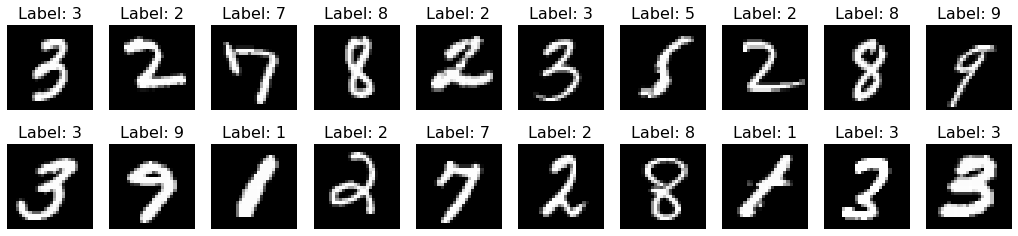

In [ ]:
np.random.seed(1)
n_x = 2
n_y = 10
indices = np.random.choice(x_train.shape[0], n_x*n_y, replace=False)
fig, ax = plt.subplots(n_x, n_y, figsize=(18,4))
for i in range(n_x):
    for j in range(n_y):
        ind = indices[i*n_y + j]
        ax[i,j].imshow(x_train[ind], cmap='gray')
        ax[i,j].set_title('Label: {}'.format(str(y_train[ind])), fontsize=16)
        ax[i,j].axis('off')

## 3) Pré-traitement

<a class='anchor' id='pretraitement'></a>

Le jeu de données doit satisfaire trois exigences vis-à-vis de notre réseau de neurones :
* les tableaux de données doivent être de taille (nombre de pixels, nombre d'exemples),
* les valeurs des pixels doivent être normalisées pour éviter la disparition du gradient,
* les cibles doivent être encodés à chaud (*one-hot encoding*).

On applique donc les transformations nécessaires aux jeux d'entraînement et de test.

In [ ]:
x_train = np.transpose(x_train.reshape(x_train.shape[0], -1))
x_test = np.transpose(x_test.reshape(x_test.shape[0], -1))
x_train = x_train/255
x_test = x_test/255
y_train = np.transpose(to_categorical(y_train, 10))
y_test = np.transpose(to_categorical(y_test, 10))

**Tests unitaires**

In [ ]:
assert x_train.shape == (784, 60000)
assert y_train.shape == (10, 60000)
assert x_test.shape == (784, 10000)
assert y_test.shape == (10, 10000)
assert x_train.min() == 0
assert x_train.max() == 1
assert x_test.min() == 0
assert x_test.max() == 1
np.testing.assert_equal(y_train.sum(axis=0), np.ones(60000))
np.testing.assert_equal(y_test.sum(axis=0), np.ones(10000))
print('Très bien !')

Très bien !


## 4) Entraînement

<a class='anchor' id='entrainement'></a>

On se propose d'entraîner un réseau à deux couches cachées, contenant respectivement 50 et 20 neurones. A cela s'ajoutent la couche d'entrée (784 pixels) et la couche de sortie (10 chiffres possibles).

In [ ]:
layers_dims = [784, 50, 20, 10]

L'entraînement s'effectue simplement par un appel à la fonction `train` définie plus haut (cela peut prendre 5 minutes).

In [ ]:
weights, costs = train(
    x_train, 
    y_train, 
    layers_dims, 
    learning_rate=0.3,
    num_iterations=301, 
    print_cost=True, 
    random_state=1
)

Cost after iteration 0: 2.371916715265806
Cost after iteration 10: 1.7514069962266663
Cost after iteration 20: 0.9488519576462691
Cost after iteration 30: 0.6964184922995711
Cost after iteration 40: 0.5706396966355205
Cost after iteration 50: 0.5285891095120916
Cost after iteration 60: 0.4619467591056367
Cost after iteration 70: 0.39286013553043936
Cost after iteration 80: 0.38336786295458497
Cost after iteration 90: 0.32870706632481084
Cost after iteration 100: 0.3128372882841344
Cost after iteration 110: 0.30513003627381347
Cost after iteration 120: 0.30860331456738926
Cost after iteration 130: 0.2855581495333494
Cost after iteration 140: 0.2687753547953137
Cost after iteration 150: 0.2601221778912673
Cost after iteration 160: 0.2529422958507767
Cost after iteration 170: 0.24703740643262828
Cost after iteration 180: 0.24507160998222066
Cost after iteration 190: 0.25735105854828505
Cost after iteration 200: 0.23832824534024116
Cost after iteration 210: 0.22401544895190287
Cost after i

On peut vérifier visuellement que le coût a bien décru et que l'apprentissage a bien saturé.

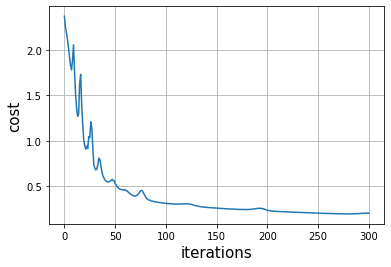

In [ ]:
plt.plot(costs)
plt.ylabel('cost', fontsize=15)
plt.xlabel('iterations', fontsize=15)
plt.grid();

## 5) Prédiction

<a class='anchor' id='prediction'></a>

A présent, on peut calculer les prédictions que fait notre réseau de neurones sur chaque image du jeu d'entraînement ou de test. La prédiction n'est pas autre chose qu'une propagation simple. On utilise donc la fonction `forward_propagation` définie plus haut. Pour l'inférence, nul besoin de décortiquer les caches.

In [ ]:
preds_train, _ = forward_propagation(x_train, weights)
preds_test, _ = forward_propagation(x_test, weights)

In [ ]:
preds_test[:, :3]

array([[1.32989742e-04, 9.51734739e-03, 2.45508848e-04],
       [1.48628897e-05, 4.81997839e-05, 9.77792739e-01],
       [3.58811652e-04, 9.62245580e-01, 6.33693097e-03],
       [2.75358987e-04, 6.56390479e-03, 2.92526798e-03],
       [1.88543322e-05, 1.73672061e-07, 2.01698999e-04],
       [2.58981402e-05, 1.14455929e-02, 1.35482480e-03],
       [1.09102229e-06, 8.20989800e-03, 1.71986811e-03],
       [9.99053872e-01, 4.49519915e-08, 6.26976316e-03],
       [1.02107036e-05, 1.96913372e-03, 2.36833370e-03],
       [1.08050746e-04, 1.24556485e-07, 7.85064068e-04]])

Les prédictions sont des tableaux encodés à chaud (*one-hot encoding*) de dimensions (nombres de classes, nombre d'exemples). Pour facilier le calcul des métrique de performances, on va les transformer en tableaux 1D, où chaque entrée est un nombre entre 0 et 9. Il suffit pour cela de prendre la position du score le plus élevé pour chaque image.

In [ ]:
y_true_train = y_train.argmax(axis=0)
y_true_test = y_test.argmax(axis=0)
y_pred_train = preds_train.argmax(axis=0)
y_pred_test = preds_test.argmax(axis=0)

In [ ]:
y_pred_test[:5]

array([7, 2, 1, 0, 4])

## 6) Performance

<a class='anchor' id='performance'></a>

Dans ce TP, on se limite à l'exactitude des prédictions. On obtient une exactitude de 95% sur le jeu de test. 

Pour information, l'exactitude de l'humain sur le jeu de test MNIST est de [99,8%](http://yann.lecun.com/exdb/publis/pdf/lecun-95a.pdf).

In [ ]:
print('Train accuracy = {:.3f}'.format((y_true_train == y_pred_train).mean()))
print('Test accuracy = {:.3f}'.format((y_true_test == y_pred_test).mean()))

Train accuracy = 0.954
Test accuracy = 0.950


## 7) Analyse d'erreurs

<a class='anchor' id='analyse'></a>

Afin d'améliorer le réseau de neurones, il est important de comprendre si les performances sont inférieures à celle d'un humain, et si oui pourquoi. On peut alors tracer des exemples d'images dont la classification est erronée. Ici, on constate plusieurs choses :
* Le jeu de données MNIST n'est pas bien nettoyé, il y a des images dupliquées.
* Le réseau semble induit en erreur par les chiffres très déformés ou en rotation extrême.
* Le réseau semble induit en erreur par les boucles non-fermées et les boucles qui dépassent
* Certains 4 sont classifiées comme des 9 et vice versa
* Certains 6 son classifiés comme des 0

Globalement, le modèle ne semble pas très robustes aux anomalies d'écriture. Les erreurs du jeu d'entraînement et du jeu de test sont similaires et relativement faibles (par rapport à la référence humaine). Un réseau plus complexe, entraîné pendant plus longtemps, ou même un réseau convolutionnel, semblent donc prometteurs pour améliorer les performances.

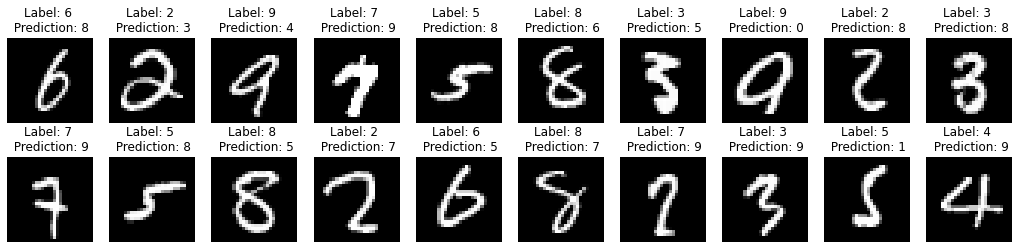

In [ ]:
np.random.seed(1)
n_x = 2
n_y = 10
mislabeled = y_true_test != y_pred_test
where = mislabeled.nonzero()[0]
indices = np.random.choice(where, n_x*n_y, replace=False)
fig, ax = plt.subplots(n_x, n_y, figsize=(18,4))
for i in range(n_x):
    for j in range(n_y):
        ind = indices[i*n_y + j]
        ax[i,j].imshow(x_test[:, ind].reshape(28, 28), cmap='gray')
        ax[i,j].set_title('Label: {} \n Prediction: {}'.format(y_true_test[ind], y_pred_test[ind]), fontsize=12)
        ax[i,j].axis('off')

___
# IV. Pour aller plus loin

<a class='anchor' id='part4'></a>

## 1) Conclusions

<a class='anchor' id='conclusions'></a>


Dans ce TP, nous nous sommes focalisés sur un réseau de neurones dense avec activations $ReLU$ et $softmax$. Pour aller plus loin, vous pouvez :

* Tester des architectures de réseau plus complexes.
* Adapter le modèle à de la classification binaire avec une couche d'activation `sigmoid` au lieu de `softmax` (la fonction de coût est inchangée).
* Adapter le modèle à de la regression (fonction de coût à adapter).
* Tester d'autres fonctions d'activation que `ReLU`, comme par exemple `leakyReLU`.
* Ajouter une pénalisation de type $L^1$ ou $L^2$ pour régulariser le réseau de neurones.
* Implémenter un apprentissage dégressif où le taux d'apprentissage `alpha` décroît dans le temps.
* Implémenter une descente de gradient par mini-batch où seules quelques images sont utilisées à chaque étape de la descente de gradient.

## 2) Comparaison : implementation en tf.keras 

<a class='anchor' id='tf-keras'></a>

In [ ]:
import tensorflow as tf

In [ ]:
(x_train_tf, y_train_tf), (x_test_tf, y_test_tf) = mnist.load_data(path=path)
x_train_tf = x_train_tf/255.0
x_test_tf = x_test_tf/255.0

In [ ]:
assert x_train_tf.shape == (60000, 28, 28)
assert y_train_tf.shape == (60000,)
assert x_test_tf.shape == (10000, 28, 28)
assert y_test_tf.shape == (10000,)
print('Très bien !')

Très bien !


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer='glorot_normal'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal')
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train_tf, y_train_tf, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2771 - accuracy: 0.9188
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1727 - accuracy: 0.9511
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1525 - accuracy: 0.9571
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1412 - accuracy: 0.9616
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1301 - accuracy: 0.9646
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1269 - accuracy: 0.9656
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1178 - accuracy: 0.9688
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1134 - accuracy: 0.9697
Epoch 9/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1077 - accuracy: 0.9722
Epoch 10/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.109

In [ ]:
score = model.evaluate(x_test_tf, y_test_tf, verbose=0)
print("test accuracy:", score[1])

test accuracy: 0.9609000086784363


In [ ]:
y_pred_tf = model.predict(x_test_tf).argmax(axis=1)
print("predictions shape:", y_pred_tf.shape)

predictions shape: (10000,)
